In [1]:
import json

# load IT skill JDs
def load_data_skill(filename):
    with open(filename, 'r') as f:
        data = json.load(f)

    f.close()
    
    return list(data)

total_skill_jds = load_data_skill('data/train/total_skill_jds.json')

In [2]:
len(total_skill_jds)

26681

In [3]:
def get_frequency_skill(skills_jds):

    frequency_skills = {}
    for skills in skills_jds:
        for skill in skills:
            if skill not in list(frequency_skills.keys()):
                frequency_skills[skill] = 1
            else:
                frequency_skills[skill] += 1

     # Sort the dictionary by frequency in descending order
    sorted_frequency_skills = dict(sorted(frequency_skills.items(), key=lambda item: item[1], reverse=False))
    
    return sorted_frequency_skills

In [4]:
frequency = get_frequency_skill(total_skill_jds)


In [5]:
statist_freq = list(frequency.values())

In [6]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

AttributeError: module 'matplotlib.mlab' has no attribute 'normpdf'

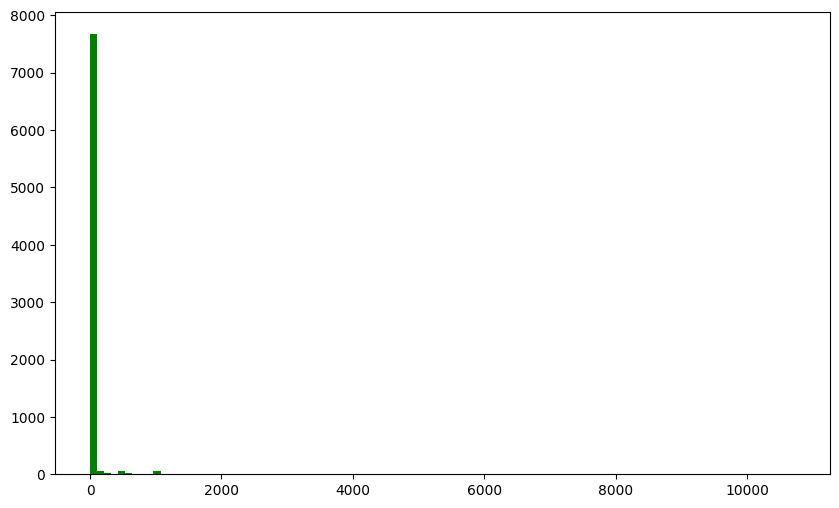

In [7]:
plt.figure(figsize=(10, 6))
# plt.style.use('ggplot')
# plt.style.use('bmh')
n, bins, patches = plt.hist(statist_freq, bins=100, facecolor='green')

y = mlab.normpdf(bins, mu, sigma)

plt.xlabel('Number of Frequency')
plt.ylabel('Number of Skills')
plt.title('Histogram for frequency of Skills')
plt.show()
# plt.savefig('slide/plot/histogram_of_frequency_skills.png')

# Plot len skills and num skill have same len

In [ ]:
# count len of skills of each jd in total_skill_jds

from collections import Counter

def count_len_jds(total_skill_jds):
    len_skills = [len(skills) for skills in total_skill_jds]
    return len_skills

statist_len = count_len_jds(total_skill_jds)

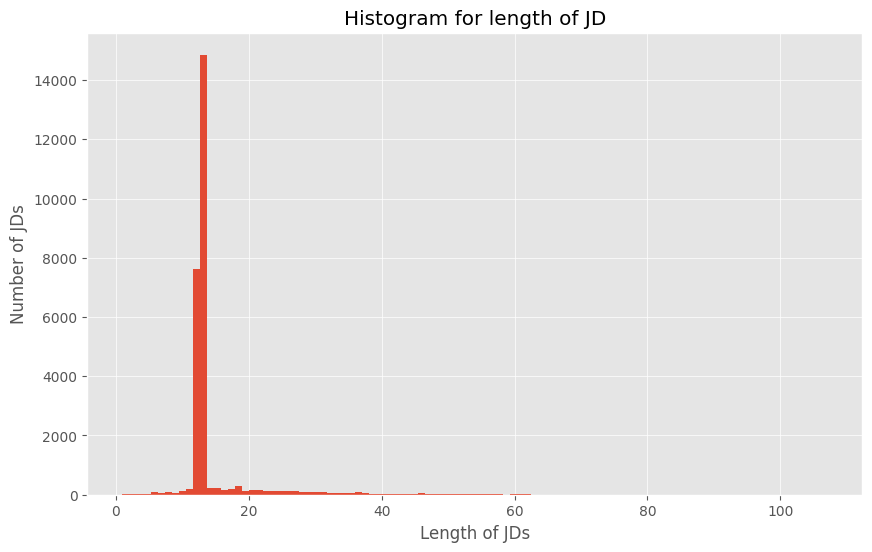

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6)) 
plt.hist(statist_len, bins=100)
plt.xlabel('Length of JDs')
plt.ylabel('Number of JDs')
plt.title('Histogram for length of JD')
plt.savefig('slide/plot/histogram_of_length_skills.png')